<a href="https://colab.research.google.com/github/siva-630/agecal/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/ecommerce_reviews_classification.csv')
df


,review_id,rating_dup,user_id,sentiment,helpful_votes,rating,review_text,verified_purchase,product_id
0,R90000,5.0,20105.0,positive,125.0,5.0,Good roduct,No,1033.0
1,R90001,5.0,NaN,positive,80.0,5.0,Terrible quality,No,1080.0
2,R90002,4.0,20356.0,positive,21.0,4.0,NaN,No,1074.0
3,R90003,5.0,20007.0,positive,189.0,5.0,Excellent!,Yes,1092.0
4,R90004,5.0,20261.0,positive,55.0,5.0,Not as expected,Yes,1033.0
...,...,...,...,...,...,...,...,...,...
260,R90056,NaN,20386.0,neutral,14.0,NaN,Terrible quality,Yes,1017.0
261,R90153,4.0,20087.0,positive,197.0,4.0,Terrible quality,No,1064.0
262,R90032,5.0,20481.0,positive,43.0,5.0,Value for money,YES,1088.0
263,R90096,5.0,20173.0,positive,74.0,5.0,Would buy again,No,1080.0


In [ ]:

print("Dataset Info:")
print(df.info(), "\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          251 non-null    object 
 1   rating_dup         256 non-null    float64
 2   user_id            252 non-null    float64
 3   sentiment          252 non-null    object 
 4   helpful_votes      248 non-null    float64
 5   rating             256 non-null    float64
 6   review_text        245 non-null    object 
 7   verified_purchase  246 non-null    object 
 8   product_id         253 non-null    float64
dtypes: float64(5), object(4)
memory usage: 18.8+ KB
None 



In [ ]:
print("Missing Values per Column:")
print(df.isnull().sum(), "\n")

Missing Values per Column:
review_id            14
rating_dup            9
user_id              13
sentiment            13
helpful_votes        17
rating                9
review_text          20
verified_purchase    19
product_id           12
dtype: int64 



In [ ]:
print("Summary Statistics:")
display(df.describe(include='all'))

Summary Statistics:


,review_id,rating_dup,user_id,sentiment,helpful_votes,rating,review_text,verified_purchase,product_id
count,251,256.000000,252.000000,252,248.000000,256.000000,245,246,253.000000
unique,236,NaN,NaN,3,NaN,NaN,27,9,NaN
top,R90004,NaN,NaN,positive,NaN,NaN,Terrible quality,Yes,NaN
freq,2,NaN,NaN,164,NaN,NaN,45,104,NaN
mean,NaN,3.730469,20252.543651,NaN,98.169355,3.730469,NaN,NaN,1048.806324
std,NaN,1.224589,142.223808,NaN,58.097185,1.224589,NaN,NaN,28.711586
min,NaN,1.000000,20002.000000,NaN,0.000000,1.000000,NaN,NaN,1000.000000
25%,NaN,3.000000,20123.500000,NaN,53.000000,3.000000,NaN,NaN,1025.000000
50%,NaN,4.000000,20256.500000,NaN,92.000000,4.000000,NaN,NaN,1049.000000
75%,NaN,5.000000,20372.500000,NaN,148.250000,5.000000,NaN,NaN,1073.000000


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':

        df[col] = df[col].fillna(df[col].mode()[0])
    else:

        df[col] = df[col].fillna(df[col].mean())

In [ ]:
print("Missing Values Handled Successfully!")
print(df.isnull().sum())

Missing Values Handled Successfully!
review_id            0
rating_dup           0
user_id              0
sentiment            0
helpful_votes        0
rating               0
review_text          0
verified_purchase    0
product_id           0
dtype: int64


In [ ]:
df['verified_purchase'] = df['verified_purchase'].str.lower().str.strip()

df['verified_purchase'] = df['verified_purchase'].replace({
    'ye': 'yes', 'ys': 'yes', 'y': 'yes', 'es': 'yes',
    'n': 'no', 'noo': 'no', 'o': 'no'
})

df['verified_purchase'] = df['verified_purchase'].map({'yes': 'Yes', 'no': 'No'})


print("Unique values after cleaning:")
print(df['verified_purchase'].unique())


Unique values after cleaning:
['No' 'Yes']


In [ ]:

duplicates_before = df.duplicated().sum()
print(f"Duplicate rows before cleaning: {duplicates_before}")


df.drop_duplicates(inplace=True)


duplicates_after = df.duplicated().sum()
print(f"Duplicate rows after cleaning: {duplicates_after}")


print(f"Total rows after removing duplicates: {len(df)}")


Duplicate rows before cleaning: 15
Duplicate rows after cleaning: 0
Total rows after removing duplicates: 250


In [ ]:

cleaned_file_path = 'cleaned_ecommerce_reviews.csv'

df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully as: {cleaned_file_path}")

from google.colab import files
files.download(cleaned_file_path)


Cleaned dataset saved successfully as: cleaned_ecommerce_reviews.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

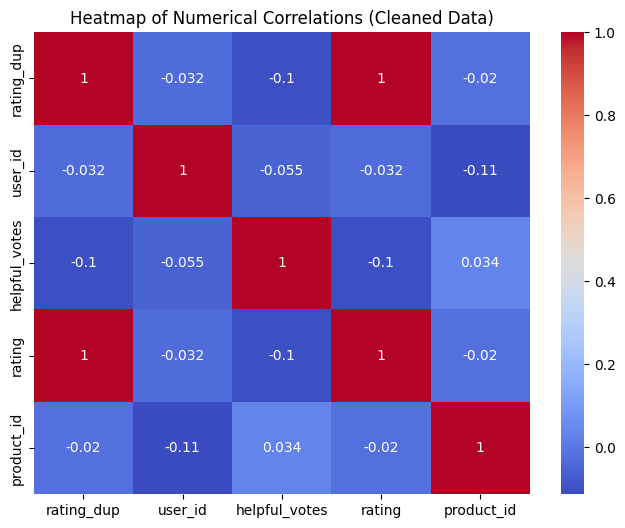

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Correlations (Cleaned Data)')
plt.show()


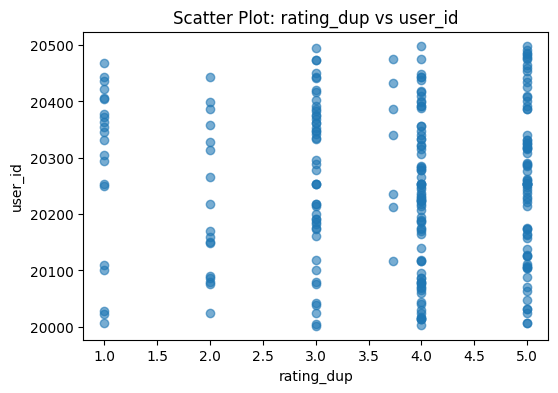

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

if len(numeric_cols) >= 2:
    plt.figure(figsize=(6,4))
    plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], alpha=0.6)
    plt.title(f'Scatter Plot: {numeric_cols[0]} vs {numeric_cols[1]}')
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.show()
else:
    print("Not enough numeric columns for scatter plot.")


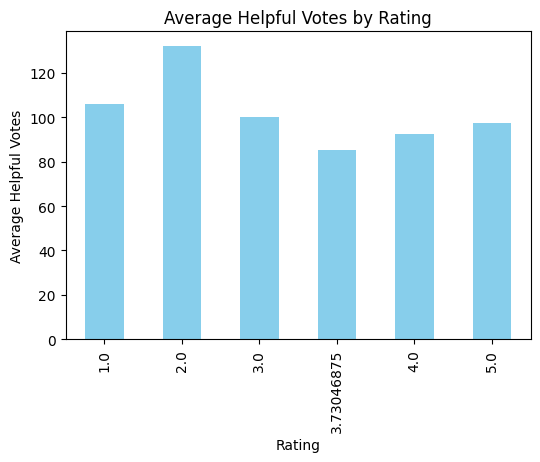

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
avg_helpful = df.groupby('rating')['helpful_votes'].mean()
avg_helpful.plot(kind='bar', color='skyblue')
plt.title('Average Helpful Votes by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Helpful Votes')
plt.show()


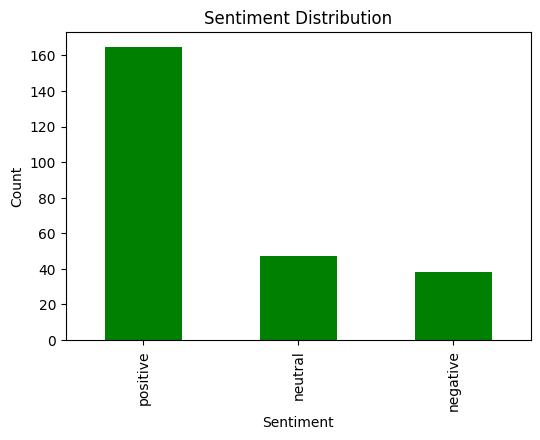

In [ ]:
plt.figure(figsize=(6,4))
df['sentiment'].value_counts().plot(kind='bar', color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


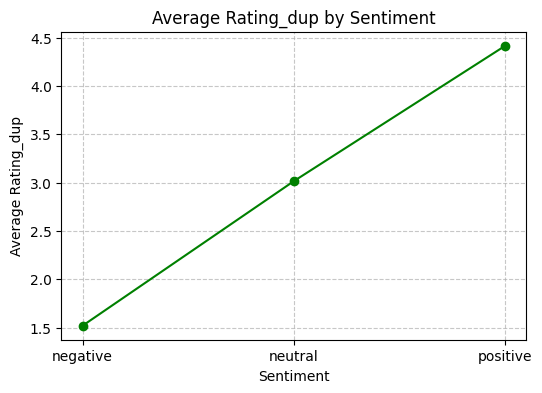

In [ ]:
plt.figure(figsize=(6,4))
avg_rating_sentiment = df.groupby('sentiment')['rating_dup'].mean()
plt.plot(avg_rating_sentiment.index, avg_rating_sentiment.values, marker='o', color='green')
plt.title('Average Rating_dup by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating_dup')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


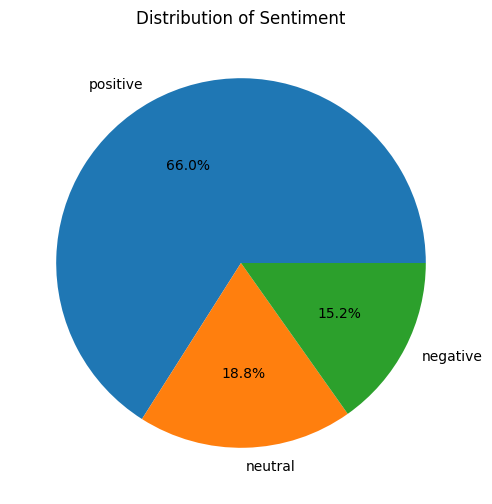

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Sentiment')
plt.ylabel('')
plt.show()


In [ ]:

print("ANALYSIS REPORT")

print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumn Data Types:")
print(df.dtypes)

cat_cols = df.select_dtypes(include='object').columns
print("\nUnique Values in Categorical Columns:")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

print("\nBasic Stats for Numeric Columns:")
print(df.describe())


ANALYSIS REPORT
Number of Rows: 250
Number of Columns: 9

Column Data Types:
review_id             object
rating_dup           float64
user_id              float64
sentiment             object
helpful_votes        float64
rating               float64
review_text           object
verified_purchase     object
product_id           float64
dtype: object

Unique Values in Categorical Columns:
review_id: 236 unique values
sentiment: 3 unique values
review_text: 27 unique values
verified_purchase: 2 unique values

Basic Stats for Numeric Columns:
       rating_dup       user_id  helpful_votes      rating   product_id
count  250.000000    250.000000     250.000000  250.000000   250.000000
mean     3.712453  20252.992270      99.019516    3.712453  1048.468253
std      1.205472    138.160414      56.304702    1.205472    27.855817
min      1.000000  20002.000000       0.000000    1.000000  1000.000000
25%      3.000000  20141.250000      55.250000    3.000000  1026.000000
50%      4.000000  202